<a href="https://colab.research.google.com/github/Aniketsh1996/Assignment_16/blob/main/Assignment_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Forestfires**

In [61]:
!pip install keras
!pip install tensorflow

In [62]:
import pandas as pd
import numpy as np
import keras
from sklearn.preprocessing import StandardScaler

In [63]:
df=pd.read_csv('forestfires.csv')

In [64]:
df

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,small


In [65]:
df1=df.drop(['month','day'],axis=1)

In [66]:
from sklearn.preprocessing import LabelEncoder

In [67]:
lb=LabelEncoder()

In [68]:
df1['size_category']=lb.fit_transform(df1['size_category'])

In [69]:
df2=df1.values
df2.shape

(517, 29)

In [70]:
x=df2[:,0:28]
y=df2[:,-1]
x.shape

(517, 28)

In [71]:
from sklearn.model_selection import GridSearchCV, KFold
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier


In [72]:
model = Sequential()
model.add(Dense(12, input_dim=28, activation='relu'))
model.add(Dense(28, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [73]:
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [74]:
model.fit(x, y, validation_split=0.33,epochs=100, batch_size=5)

Epoch 1/100
70/70 [==============================] - 1s 4ms/step - loss: 3.2818 - accuracy: 0.7139 - val_loss: 0.7068 - val_accuracy: 0.6842
Epoch 2/100
70/70 [==============================] - 0s 2ms/step - loss: 0.5757 - accuracy: 0.7746 - val_loss: 0.6882 - val_accuracy: 0.7135
Epoch 3/100
70/70 [==============================] - 0s 2ms/step - loss: 0.4949 - accuracy: 0.7861 - val_loss: 0.6113 - val_accuracy: 0.7193
Epoch 4/100
70/70 [==============================] - 0s 2ms/step - loss: 0.4395 - accuracy: 0.8266 - val_loss: 0.5806 - val_accuracy: 0.7076
Epoch 5/100
70/70 [==============================] - 0s 2ms/step - loss: 0.3894 - accuracy: 0.8410 - val_loss: 0.5886 - val_accuracy: 0.6491
Epoch 6/100
70/70 [==============================] - 0s 2ms/step - loss: 0.3531 - accuracy: 0.8526 - val_loss: 0.6243 - val_accuracy: 0.7485
Epoch 7/100
70/70 [==============================] - 0s 2ms/step - loss: 0.3399 - accuracy: 0.8671 - val_loss: 0.5378 - val_accuracy: 0.7953
Epoch 8/100
7

In [75]:
scores=model.evaluate(x,y)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

17/17 [==============================] - 0s 1ms/step - loss: 0.0761 - accuracy: 0.9749
accuracy: 97.49%


# **Gas Turbine**

In [76]:
df=pd.read_csv("gas_turbines.csv")

In [77]:
df

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


In [78]:
df1=df.values
df1

array([[   6.8594, 1007.9   ,   96.799 , ...,   10.605 ,    3.1547,
          82.722 ],
       [   6.785 , 1008.4   ,   97.118 , ...,   10.598 ,    3.2363,
          82.776 ],
       [   6.8977, 1008.8   ,   95.939 , ...,   10.601 ,    3.2012,
          82.468 ],
       ...,
       [   7.2647, 1006.3   ,   99.496 , ...,   10.483 ,    7.9632,
          90.912 ],
       [   7.006 , 1006.8   ,   99.008 , ...,   10.533 ,    6.2494,
          93.227 ],
       [   6.9279, 1007.2   ,   97.533 , ...,   10.583 ,    4.9816,
          92.498 ]])

In [79]:
X=df1[:,[0,1,2,3,4,5,6,8,9,10]]
Y=df1[:,-4]
X

array([[   6.8594, 1007.9   ,   96.799 , ...,   10.605 ,    3.1547,
          82.722 ],
       [   6.785 , 1008.4   ,   97.118 , ...,   10.598 ,    3.2363,
          82.776 ],
       [   6.8977, 1008.8   ,   95.939 , ...,   10.601 ,    3.2012,
          82.468 ],
       ...,
       [   7.2647, 1006.3   ,   99.496 , ...,   10.483 ,    7.9632,
          90.912 ],
       [   7.006 , 1006.8   ,   99.008 , ...,   10.533 ,    6.2494,
          93.227 ],
       [   6.9279, 1007.2   ,   97.533 , ...,   10.583 ,    4.9816,
          92.498 ]])

In [80]:
from sklearn.model_selection import train_test_split

In [81]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.25,random_state=101)

In [82]:
from sklearn.preprocessing import MinMaxScaler

In [83]:
scaler=MinMaxScaler()
scaler.fit(x_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [84]:
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)
x_test

array([[0.35890393, 0.40602285, 0.91801706, ..., 0.34107329, 0.03084967,
        0.48475958],
       [0.55162803, 0.59086189, 0.72785444, ..., 0.42819611, 0.02833486,
        0.43366477],
       [0.69430373, 0.53478712, 0.55215014, ..., 0.14847583, 0.15186537,
        0.33822331],
       ...,
       [0.29923532, 0.48494289, 0.94876603, ..., 0.77514199, 0.00101504,
        0.41400706],
       [0.64399376, 0.35825545, 0.50904718, ..., 0.04705791, 0.10100297,
        0.36756316],
       [0.3486443 , 0.24340602, 0.81637941, ..., 0.34416412, 0.00787964,
        0.54170062]])

In [85]:
model = Sequential()
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
# add nodes for prediction
model.add(Dense(1))

In [86]:
model.compile(optimizer='rmsprop',loss='mse')

In [87]:
# Fit the model
model.fit(x_train, y_train, epochs=250)

Epoch 1/250
353/353 [==============================] - 1s 982us/step - loss: 15722.5898
Epoch 2/250
353/353 [==============================] - 0s 1ms/step - loss: 3586.2864
Epoch 3/250
353/353 [==============================] - 0s 1ms/step - loss: 34.3342
Epoch 4/250
353/353 [==============================] - 0s 1ms/step - loss: 23.0907
Epoch 5/250
353/353 [==============================] - 0s 1ms/step - loss: 19.7388
Epoch 6/250
353/353 [==============================] - 0s 1ms/step - loss: 17.0087
Epoch 7/250
353/353 [==============================] - 0s 1ms/step - loss: 14.7156
Epoch 8/250
353/353 [==============================] - 0s 990us/step - loss: 10.8337
Epoch 9/250
353/353 [==============================] - 0s 1ms/step - loss: 8.1163
Epoch 10/250
353/353 [==============================] - 0s 1ms/step - loss: 6.2471
Epoch 11/250
353/353 [==============================] - 0s 1ms/step - loss: 4.9256
Epoch 12/250
353/353 [==============================] - 0s 1ms/step - loss: 4.0

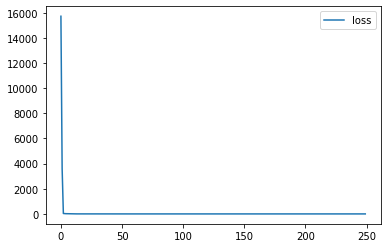

In [88]:
%matplotlib inline
import matplotlib as plot
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [89]:
pred = model.predict(x_test)

In [90]:
pred

array([[131.9494  ],
       [133.3162  ],
       [110.57254 ],
       ...,
       [159.9654  ],
       [104.052635],
       [132.32317 ]], dtype=float32)

In [91]:
pred = pred.ravel()

In [92]:
test_score = model.evaluate(x_test,y_test,verbose=0)
test_score

0.7546501755714417

In [93]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [94]:
mean_absolute_error(pred,y_test)

0.6965096364122757

In [95]:
mean_squared_error(pred,y_test)

0.7546495434845151

In [96]:
import matplotlib.pyplot as plt

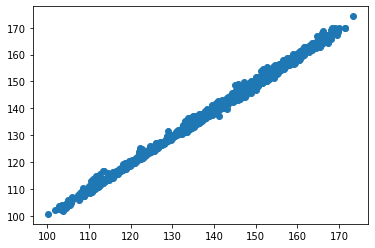

In [97]:
plt.scatter(y_test,pred)